In [1]:
!wget https://raw.githubusercontent.com/salemprakash/EDA/main/Data/BEPS.csv


--2024-09-24 16:58:11--  https://raw.githubusercontent.com/salemprakash/EDA/main/Data/BEPS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59127 (58K) [text/plain]
Saving to: ‘BEPS.csv’

BEPS.csv            100%[===================>]  57.74K  --.-KB/s    in 0.02s   

2024-09-24 16:58:11 (2.83 MB/s) - ‘BEPS.csv’ saved [59127/59127]



Load the Dataset

In [6]:
import pandas as pd
data = pd.read_csv('BEPS.csv', index_col=0)
data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Kennedy,Europe,political.knowledge,gender
rownames,,,,,,,,,,
1,Liberal Democrat,43,3,3,4,1,4,2,2,female
2,Labour,36,4,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,3,2,male
4,Labour,24,4,2,2,1,3,4,0,female
5,Labour,41,2,2,1,1,4,6,2,male


Explore the Dataset's Dimensions and Summary

In [8]:
# Dimensions of the dataset
print(f"Dimensions of dataset: {data.shape}")

Dimensions of dataset: (1525, 10)


In [9]:
# Summary statistics
print("Summary statistics:")
print(data.describe())

Summary statistics:
               age  economic.cond.national  economic.cond.household  \
count  1525.000000             1525.000000              1525.000000   
mean     54.182295                3.245902                 3.140328   
std      15.711209                0.880969                 0.929951   
min      24.000000                1.000000                 1.000000   
25%      41.000000                3.000000                 3.000000   
50%      53.000000                3.000000                 3.000000   
75%      67.000000                4.000000                 4.000000   
max      93.000000                5.000000                 5.000000   

             Blair        Hague      Kennedy       Europe  political.knowledge  
count  1525.000000  1525.000000  1525.000000  1525.000000          1525.000000  
mean      3.334426     2.746885     3.135082     6.728525             1.542295  
std       1.174824     1.230703     1.081997     3.297538             1.083315  
min       1.0000

In [10]:
# Data types of each column
print("\nData types:")
print(data.dtypes)


Data types:
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Kennedy                     int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object


In [11]:
# Basic information of the dataset
print("\nDataset Information:")
data.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 1525 entries, 1 to 1525
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Kennedy                  1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 131.1+ KB


Data Handling and Cleaning

In [12]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Kennedy                    0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64


In [13]:
# Convert categorical columns to appropriate types
categorical_columns = ['vote', 'gender']
for column in categorical_columns:
    data[column] = data[column].astype('category')


In [14]:
# Display the updated data types
print("\nUpdated Data Types after conversion:")
print(data.dtypes)



Updated Data Types after conversion:
vote                       category
age                           int64
economic.cond.national        int64
economic.cond.household       int64
Blair                         int64
Hague                         int64
Kennedy                       int64
Europe                        int64
political.knowledge           int64
gender                     category
dtype: object


Univariate Analysis


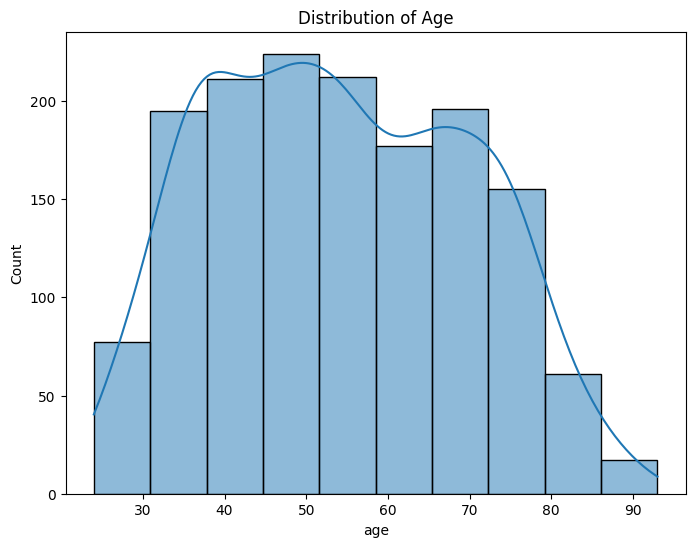

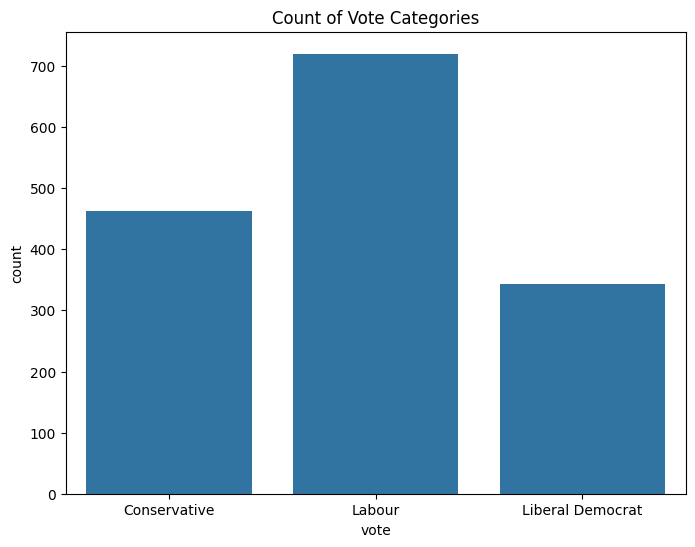

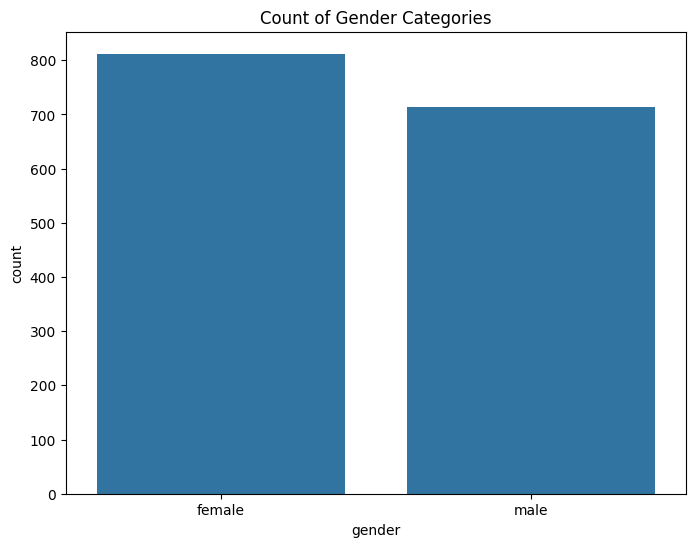

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'age'
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True, bins=10)
plt.title('Distribution of Age')
plt.show()

# Countplot for 'vote'
plt.figure(figsize=(8, 6))
sns.countplot(x='vote', data=data)
plt.title('Count of Vote Categories')
plt.show()

# Countplot for 'gender'
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=data)
plt.title('Count of Gender Categories')
plt.show()


Bivariate Analysis

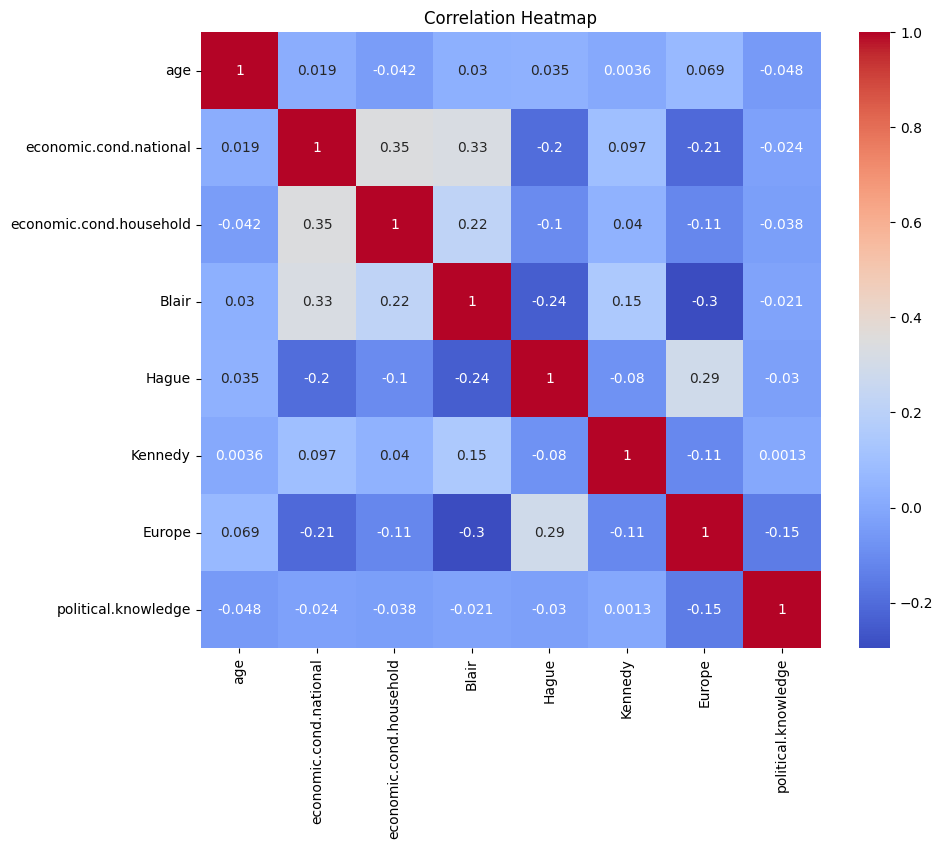

In [17]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])

# Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Multivariate Analysis

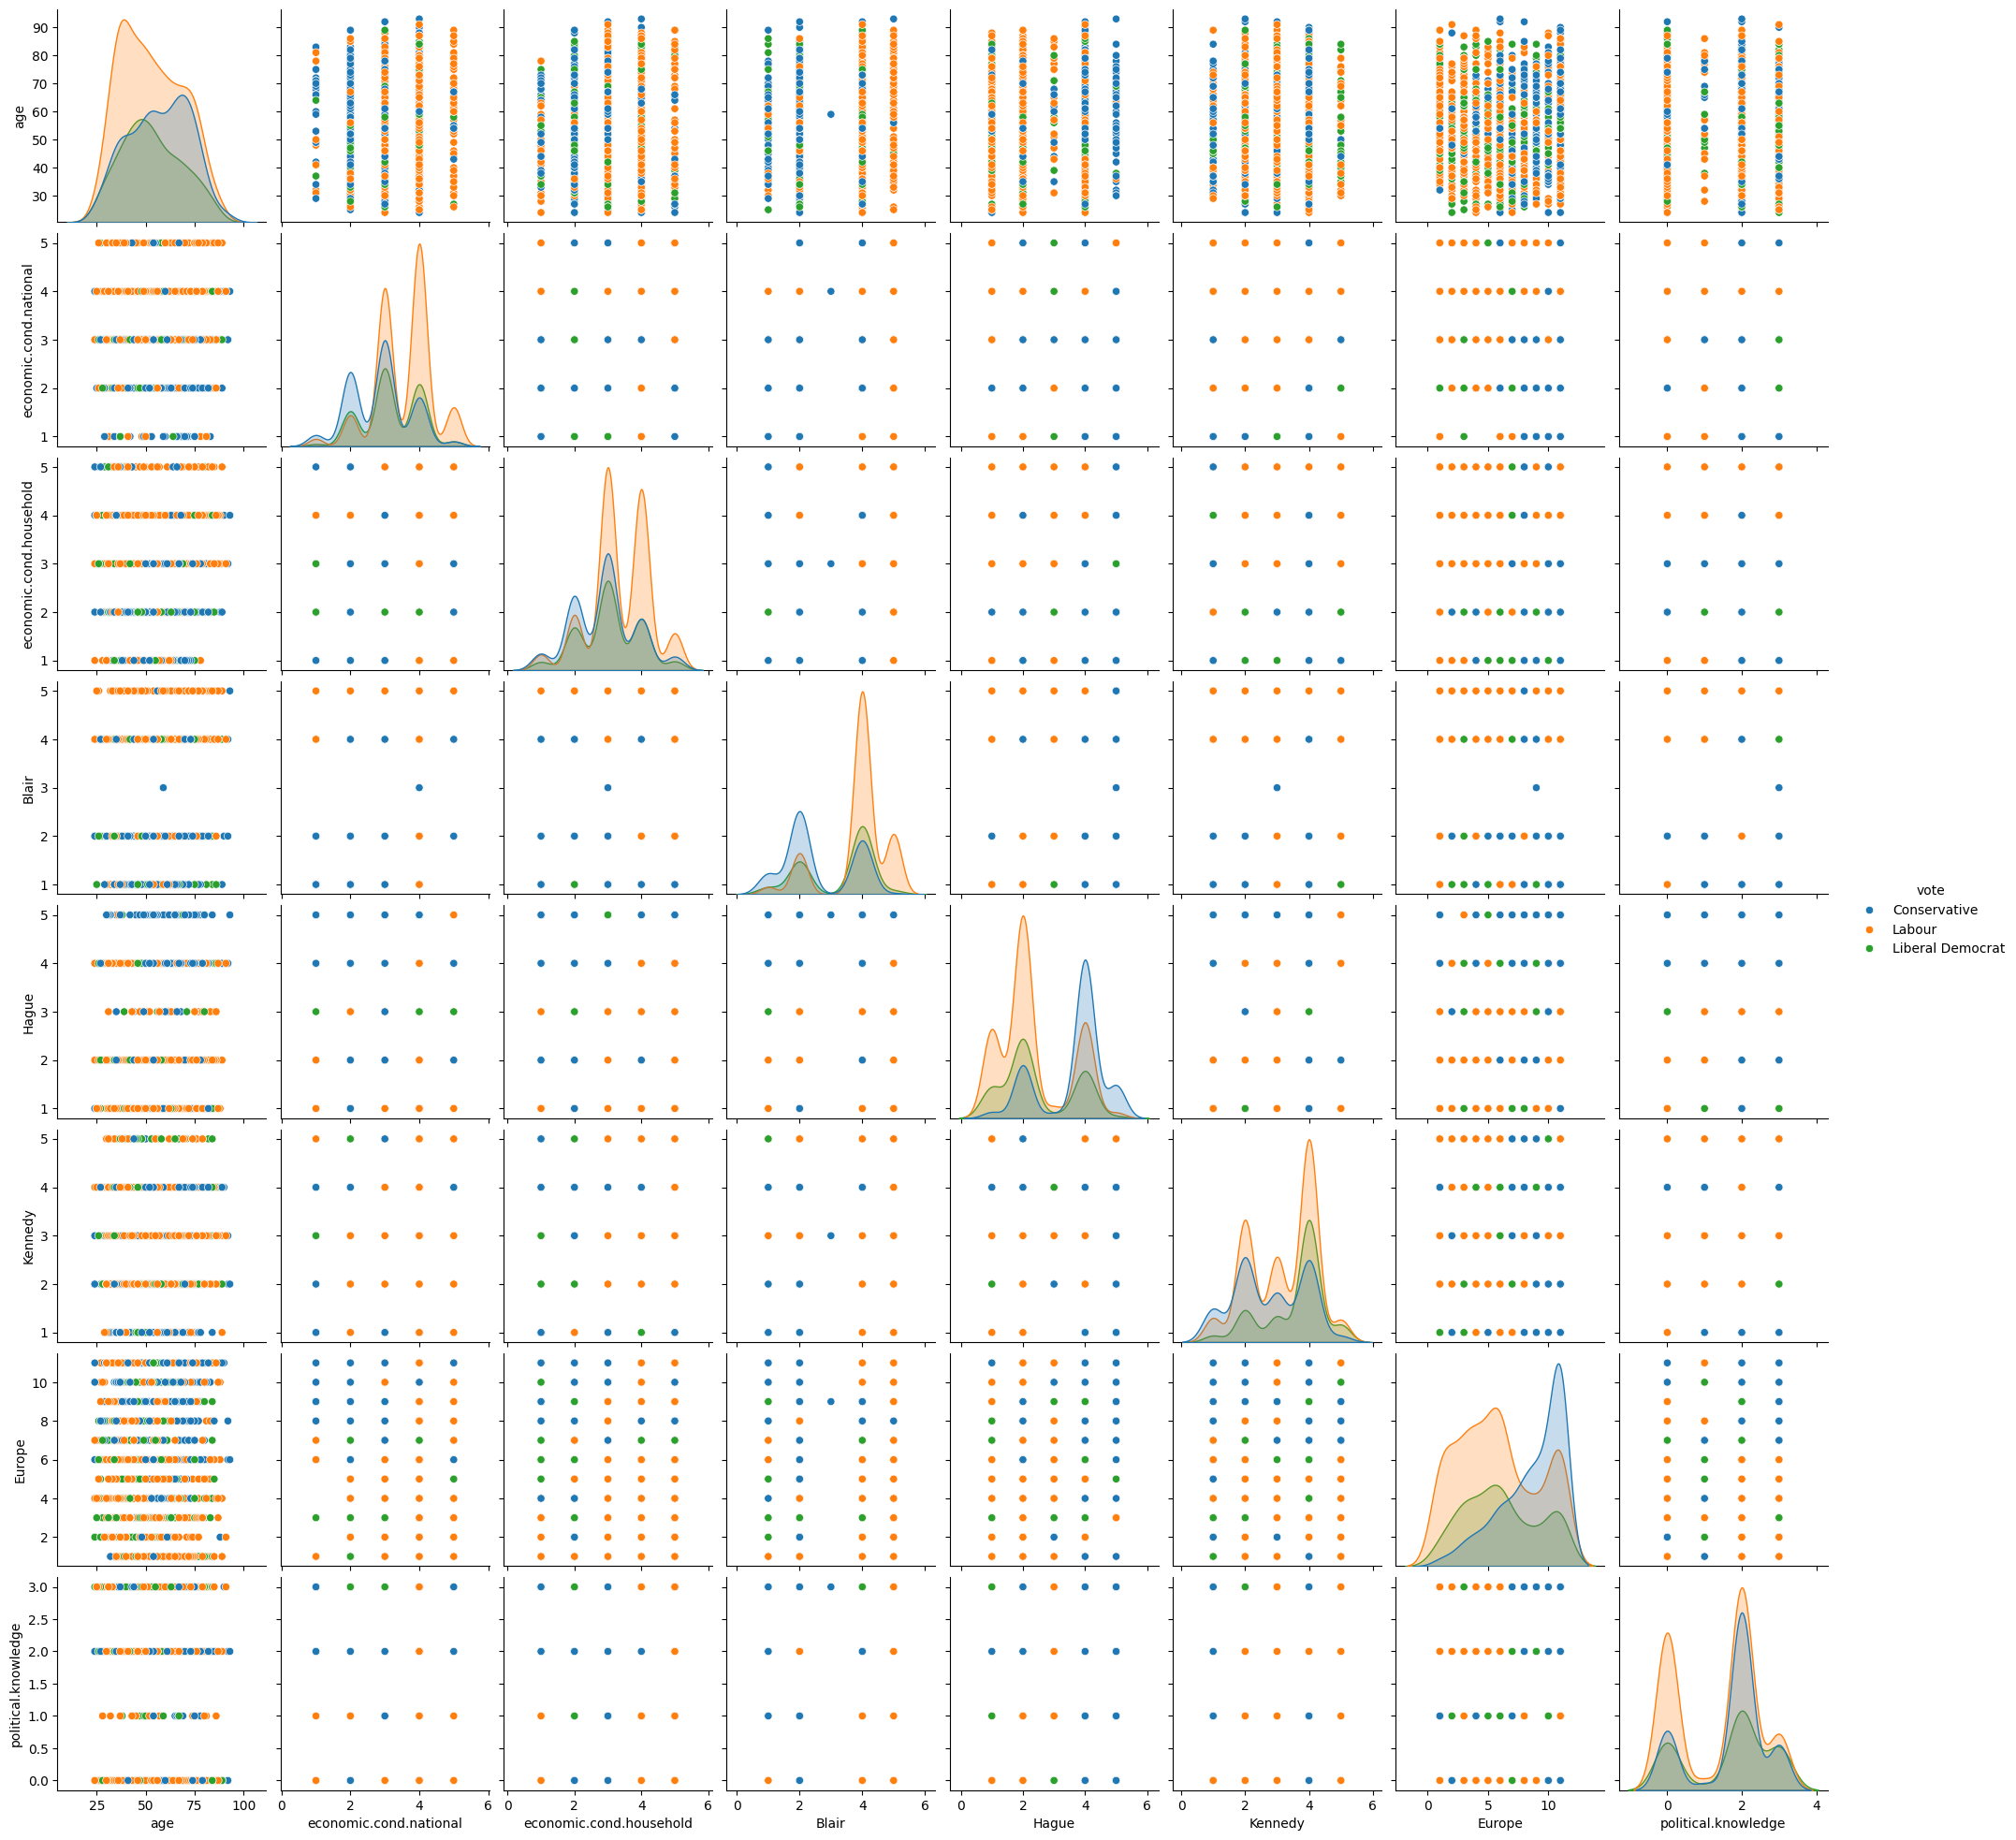

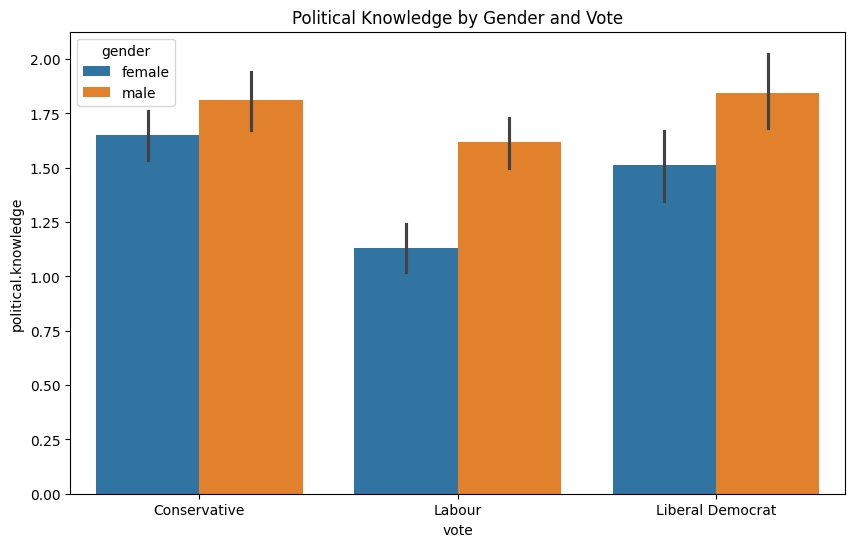

In [18]:
# Pairplot to analyze interactions between numerical features
sns.pairplot(data, hue='vote', diag_kind='kde')
plt.show()

# Multivariate barplot for 'gender', 'vote', and 'political.knowledge'
plt.figure(figsize=(10, 6))
sns.barplot(x='vote', y='political.knowledge', hue='gender', data=data)
plt.title('Political Knowledge by Gender and Vote')
plt.show()


Basic Data Analysis - Info and Describe

In [19]:
# Basic statistics for numerical columns
print("Numerical Columns Statistics:")
print(data.describe())

# Display value counts for categorical columns
print("\nVote Category Counts:")
print(data['vote'].value_counts())

print("\nGender Category Counts:")
print(data['gender'].value_counts())


Numerical Columns Statistics:
               age  economic.cond.national  economic.cond.household  \
count  1525.000000             1525.000000              1525.000000   
mean     54.182295                3.245902                 3.140328   
std      15.711209                0.880969                 0.929951   
min      24.000000                1.000000                 1.000000   
25%      41.000000                3.000000                 3.000000   
50%      53.000000                3.000000                 3.000000   
75%      67.000000                4.000000                 4.000000   
max      93.000000                5.000000                 5.000000   

             Blair        Hague      Kennedy       Europe  political.knowledge  
count  1525.000000  1525.000000  1525.000000  1525.000000          1525.000000  
mean      3.334426     2.746885     3.135082     6.728525             1.542295  
std       1.174824     1.230703     1.081997     3.297538             1.083315  
min   

Preprocessing the Dataset

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Create a copy of the data for model building
df_model = data.copy()

# Encode categorical variables (vote, gender)
label_encoder = LabelEncoder()
df_model['vote'] = label_encoder.fit_transform(df_model['vote'])
df_model['gender'] = label_encoder.fit_transform(df_model['gender'])

# Display the transformed dataset
df_model.head()


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Kennedy,Europe,political.knowledge,gender
rownames,,,,,,,,,,
1,2,43,3,3,4,1,4,2,2,0
2,1,36,4,4,4,4,4,5,2,1
3,1,35,4,4,5,2,3,3,2,1
4,1,24,4,2,2,1,3,4,0,0
5,1,41,2,2,1,1,4,6,2,1


Split the Dataset into Features and Target Variable

In [21]:
# Split the data into features (X) and target (y)
X = df_model.drop('vote', axis=1)  # Features
y = df_model['vote']               # Target (Vote)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (1220, 9)
Test set size: (305, 9)


Train a Machine Learning Model (Logistic Regression)

Accuracy: 0.6426229508196721

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.72      0.68        89
           1       0.66      0.82      0.73       140
           2       0.53      0.22      0.31        76

    accuracy                           0.64       305
   macro avg       0.61      0.59      0.58       305
weighted avg       0.62      0.64      0.61       305



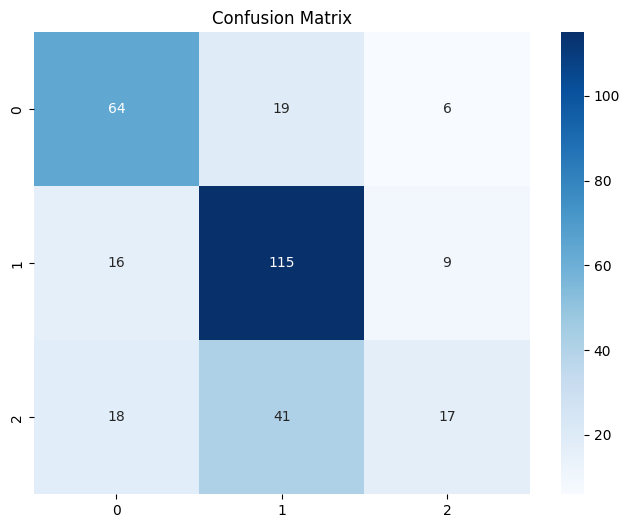

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


Complex Model (Random Forest)

Random Forest Accuracy: 0.6295081967213115

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.64      0.66      0.65        89
           1       0.66      0.79      0.72       140
           2       0.50      0.30      0.38        76

    accuracy                           0.63       305
   macro avg       0.60      0.58      0.58       305
weighted avg       0.61      0.63      0.61       305



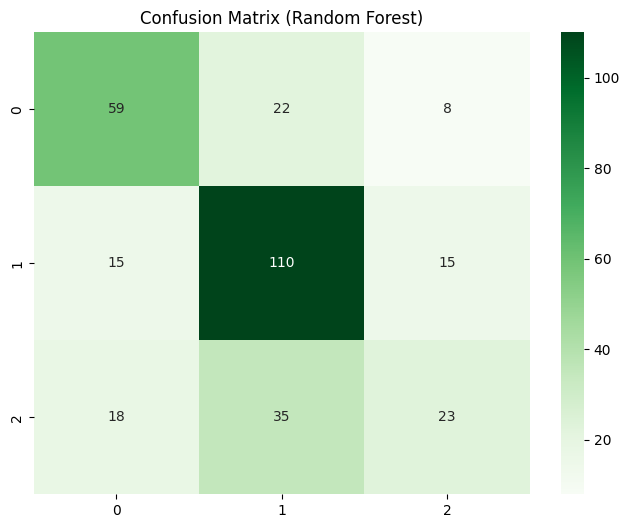

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Model evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for Random Forest
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (Random Forest)")
plt.show()


 Feature Importance (Random Forest)

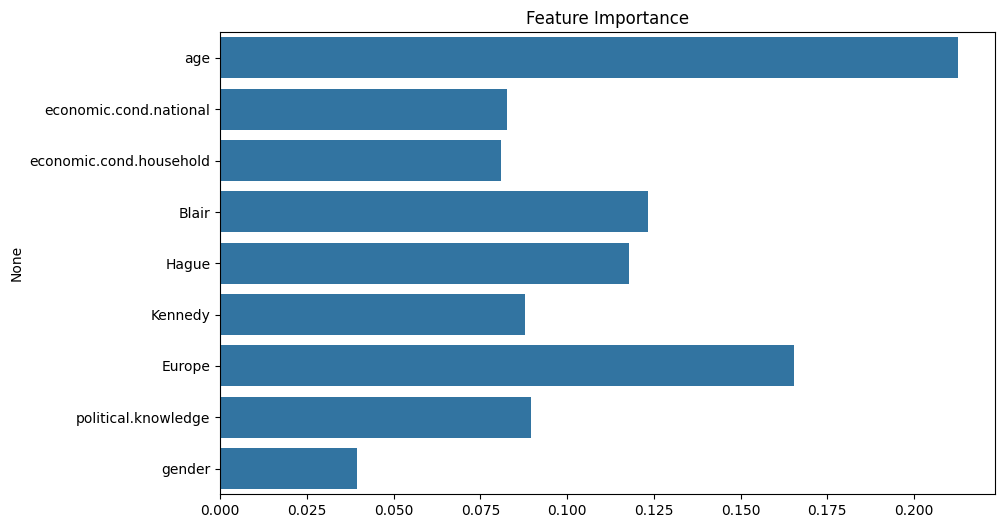

In [24]:
importances = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()
